In [11]:
import openslide
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the WSI files (replace 'path_to_wsi_1' and 'path_to_wsi_2' with your file paths)
WSI_1 = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-23-1022-01Z-00-DX1.AF9E523E-CB0F-4AB5-AD43-C96731BF9141.svs'
WSI_2 = '/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ3585_22-2-1-1.mrxs'


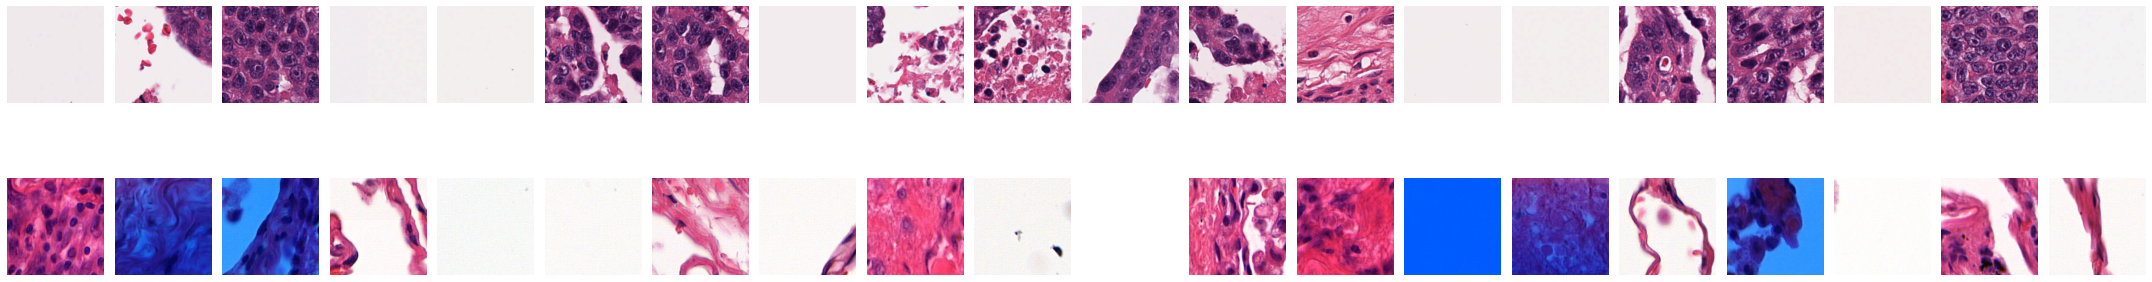

In [12]:

# Function to extract a patch from the middle region of a WSI
def get_middle_patch(slide, level):
    # Determine the dimensions at the specified level
    level_dimension = slide.level_dimensions[level]
    level_downsample = slide.level_downsamples[level]

    # Calculate the center region
    center_x = int(level_dimension[0] * level_downsample / 2)
    center_y = int(level_dimension[1] * level_downsample / 2)
    half_width = int(level_dimension[0] * level_downsample / 4)
    half_height = int(level_dimension[1] * level_downsample / 4)

    # Randomly choose the top-left pixel of our patch within the center region
    x = random.randint(center_x - half_width, center_x + half_width - 224)
    y = random.randint(center_y - half_height, center_y + half_height - 224)

    # Extract the patch
    patch = slide.read_region((x, y), level, (224, 224))
    return patch

# Load the WSI files (replace 'path_to_wsi_1' and 'path_to_wsi_2' with your file paths)
slide_1 = openslide.OpenSlide(WSI_1)
slide_2 = openslide.OpenSlide(WSI_2)

# Adjust these levels for visualization
vis_level_slide_1 = 0
vis_level_slide_2 = 0

# Plotting
fig, axs = plt.subplots(2, 20, figsize=(30, 6))
for i in range(20):
    patch_1 = get_middle_patch(slide_1, vis_level_slide_1)
    axs[0, i].imshow(patch_1)
    axs[0, i].axis('off')

    patch_2 = get_middle_patch(slide_2, vis_level_slide_2)
    axs[1, i].imshow(patch_2)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()